# Sentiment Analysis on McDonald Store Reviews

## Project Overview

The goal of this project is to analyze customer reviews from various McDonald's locations across the nation to predict star ratings and understand customer sentiment. By using sentiment analysis, the model aims to provide insights into customer satisfaction, helping McDonald’s identify areas for improvement in service, food quality, and overall experience.

## Summary Report

For this project, a supervised machine learning classification was used. The dataset was split early on into training, validation, and test sets to ensure proper model evaluation and to avoid overfitting.

The feature engineering process included text cleaning, such as removing special characters, short words, and newline symbols, to ensure each review was in a clean, single-line format. Various text vectorization techniques were applied, including TF-IDF, Word2Vec, and GloVe embeddings, to convert raw text into numerical features.

Initially, review ratings ranged from 1 to 5 stars. These were simplified into binary sentiment classes, where ratings of 1–2 were labeled as negative, and 3–5 as positive.

Multiple classification models were tested, including Logistic Regression, Support Vector Classifier (SVC), Random Forest, Naive Bayes, and Gradient Boosting. Various combinations of vectorization and model types were evaluated to find the best performing pipeline. The best performing model was the Support Vector Classifier using TF-IDF vectorization which achieved the highest accuracy and was selected as the optimal solution.

The baseline models using TF-IDF and various classifiers showed strong initial performance, with the Support Vector Classifier (SVC) outperforming others. When alternative word embedding methods were applied, the SVC with TF-IDF still outperformed both Word2Vec and GloVe, which suggests that TF-IDF was better suited for the McDonald’s review data. After tuning, the SVC model maintained similar accuracy, indicating that the default hyperparameters were already close to optimal for this dataset, and further tuning provided minimal performance improvement. However, the tuned model's performance on the test set remained consistent acheiving an accuracy of 0.8912.

In [75]:
print("\nModel Accuracies:")
for name, acc in accuracies:
    print(f"{name:25s}: {acc:.4f}")
    
    
print("\nSVC with Different Text Representations:")
print("TF-IDF SVC (Base)        :", f"{svc_accuracy:.4f}")
print("Word2Vec + SVC           :", f"{accuracy_score(y_val, y_val_pred_w2v):.4f}")
print("GloVe + SVC              :", f"{accuracy_score(y_val, y_val_pred_glove):.4f}")

print("\nTuned Model Performance:")
print("Tuned SVC                :", f"{accuracy_score(y_val, y_val_pred):.4f}")

print("\nAccuracy for Test Dataset:")
print("Tuned SVC (Test)         :", f"{accuracy_score(y_test, y_test_pred):.4f}")


Model Accuracies:
Logistic Regression      : 0.8834
Support Vector Classifier: 0.8909
Random Forest            : 0.8752
Naive Bayes              : 0.8752
Gradient Boosting        : 0.8280

SVC with Different Text Representations:
TF-IDF SVC (Base)        : 0.8909
Word2Vec + SVC           : 0.8790
GloVe + SVC              : 0.8269

Tuned Model Performance:
Tuned SVC                : 0.8909

Accuracy for Test Dataset:
Tuned SVC (Test)         : 0.8912


### Gathering Data from Google Maps API

This script collects customer reviews from McDonald's locations across all 50 U.S. states using the Google Maps API.

For each state, the script queries the Text Search API to find McDonald's locations and extracts details like name, address, coordinates, and place ID.

Using the Place Details API, it retrieves reviews for each location, including review text, rating, and timestamp.

Review timestamps are converted to readable dates, and the final dataset is saved as mcdonalds_reviews.csv.

In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import requests
import time
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [132]:
API_KEY = "***************"

In [136]:
import requests
import time
import pandas as pd

SEARCH_URL = "https://maps.googleapis.com/maps/api/place/textsearch/json"

states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", 
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", 
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

all_locations = []

for state in states:
    print(f"Searching in {state}...")
    params = {
        "query": f"McDonald's in {state}",
        "key": API_KEY
    }

    while True:
        response = requests.get(SEARCH_URL, params=params).json()
        all_locations.extend(response.get("results", []))

        next_page_token = response.get("next_page_token")
        if not next_page_token:
            break

        time.sleep(2)
        params["pagetoken"] = next_page_token

df_locations = pd.DataFrame(all_locations)
df_locations = df_locations[["name", "formatted_address", "geometry", "place_id", "user_ratings_total"]]
df_locations["latitude"] = df_locations["geometry"].apply(lambda x: x["location"]["lat"])
df_locations["longitude"] = df_locations["geometry"].apply(lambda x: x["location"]["lng"])
df_locations.drop(columns=["geometry"], inplace=True)

df_locations.rename(columns={"formatted_address": "store_address", "user_ratings_total": "rating_count"}, inplace=True)

print(f"Found {len(df_locations)} McDonald's locations across all 50 states.")
df_locations.head()


Searching in Alabama...
Searching in Alaska...
Searching in Arizona...
Searching in Arkansas...
Searching in California...
Searching in Colorado...
Searching in Connecticut...
Searching in Delaware...
Searching in Florida...
Searching in Georgia...
Searching in Hawaii...
Searching in Idaho...
Searching in Illinois...
Searching in Indiana...
Searching in Iowa...
Searching in Kansas...
Searching in Kentucky...
Searching in Louisiana...
Searching in Maine...
Searching in Maryland...
Searching in Massachusetts...
Searching in Michigan...
Searching in Minnesota...
Searching in Mississippi...
Searching in Missouri...
Searching in Montana...
Searching in Nebraska...
Searching in Nevada...
Searching in New Hampshire...
Searching in New Jersey...
Searching in New Mexico...
Searching in New York...
Searching in North Carolina...
Searching in North Dakota...
Searching in Ohio...
Searching in Oklahoma...
Searching in Oregon...
Searching in Pennsylvania...
Searching in Rhode Island...
Searching in 

,name,store_address,place_id,rating_count,latitude,longitude
0,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",ChIJM-8_6AockIgRw4BIDSHa5us,864.0,31.505349,-87.318006
1,McDonald's,"75280 AL-77, Lincoln, AL 35096, United States",ChIJiVdIJ1vQi4gRs_s-zJIcFXQ,1175.0,33.587322,-86.124702
2,McDonald's,"22183 AL-216, McCalla, AL 35111, United States",ChIJj_aBCvjEiIgRvydkryNwFUI,2137.0,33.278784,-87.098758
3,McDonald's,"2920 20th Ave, Valley, AL 36854, United States",ChIJWeldHRy7jIgRxoSNjZILgiQ,1618.0,32.844645,-85.180962
4,McDonald's,"6065 AL-157, Cullman, AL 35057, United States",ChIJo5D7k1LJiYgRpdyG3lNzhcQ,2212.0,34.206691,-86.876515


In [138]:
DETAILS_URL = "https://maps.googleapis.com/maps/api/place/details/json"

all_reviews = []

for _, row in df_locations.iterrows():
    place_id = row["place_id"]
    place_name = row["name"]
    store_address = row["store_address"]
    latitude = row["latitude"]
    longitude = row["longitude"]
    rating_count = row["rating_count"]

    details_params = {
        "place_id": place_id,
        "fields": "name,reviews",
        "key": API_KEY
    }

    response = requests.get(DETAILS_URL, params=details_params).json()
    reviews = response.get("result", {}).get("reviews", [])

    for review in reviews:
        all_reviews.append({
            "restaurant": place_name,
            "store_address": store_address,
            "latitude": latitude,
            "longitude": longitude,
            "rating_count": rating_count,
            "review_time": review["time"],
            "review": review["text"],
            "rating": review["rating"]
        })

df_reviews = pd.DataFrame(all_reviews)

print(f"Collected {len(df_reviews)} reviews.")
df_reviews.head()


Collected 13987 reviews.


,restaurant,store_address,latitude,longitude,rating_count,review_time,review,rating
0,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,1691604809,This was a town we used to live in many years ...,5
1,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,1733586008,"I often choose delivery for its convenience, a...",1
2,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,1676424211,The crew working at this McDonald’s in Monroev...,5
3,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,1737999241,I ordered 2-6 piece chicken Nuggets and only r...,2
4,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,1725976359,We were going to have lunch at McDonald's. We ...,1


In [139]:
from datetime import datetime

df_reviews["review_time"] = df_reviews["review_time"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_reviews.head()

C:\Users\Benny\AppData\Local\Temp\ipykernel_20080\3921890197.py:3: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df_reviews["review_time"] = df_reviews["review_time"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))


,restaurant,store_address,latitude,longitude,rating_count,review_time,review,rating
0,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,2023-08-09 18:13:29,This was a town we used to live in many years ...,5
1,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,2024-12-07 15:40:08,"I often choose delivery for its convenience, a...",1
2,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,2023-02-15 01:23:31,The crew working at this McDonald’s in Monroev...,5
3,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,2025-01-27 17:34:01,I ordered 2-6 piece chicken Nuggets and only r...,2
4,McDonald's,"1511 S Alabama Ave, Monroeville, AL 36460, Uni...",31.505349,-87.318006,864.0,2024-09-10 13:52:39,We were going to have lunch at McDonald's. We ...,1


In [144]:
df_reviews.to_csv("mcdonalds_reviews.csv", index=False)

In [6]:
df_api = pd.read_csv("mcdonalds_reviews.csv", encoding='latin1')

### Cleaning Kaggle Data

This section performs initial cleaning on the Kaggle McDonald’s review dataset.

Then a baisc look at rows with missing values.

One review mentioned "Waikiki Beach" but lacked location data. The code manually updates the address and coordinates for that entry using its known location in Honolulu, Hawaii.

In [11]:
df_kaggle = pd.read_csv('kaggle_mc_reviews.csv', encoding='latin1')

In [12]:
df_kaggle.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [13]:
df_kaggle[df_kaggle.isnull().any(axis=1)].head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
22141,22142,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,NaN,NaN,"2,175",3 months ago,Breakfast specials are good. The sausage burrito and sausage McMuffins with eggs are freshly cooked. Been wanting to try their spam eggs and rice but during our visit their rice cooker isnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t working so t,4 stars
22142,22143,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,NaN,NaN,"2,175",a year ago,"This isn't your typical McDonald's. This place is located at Waikea Beach.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ So, there is a lot of foot traffic.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ It can get very busy here.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ There are signs all over asking you to limit your stay to 30 minutes. I've seen the line to order going front the order window to outside the door. But, there are kiosks available to order from.\n\nFood consistent with one expects from this chain.\n\nNice Hawaiian music playing throughout the day on their sound system.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½",5 stars
22143,22144,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,NaN,NaN,"2,175",2 weeks ago,This place was serving good quality breakfast items at good prices. The speed of service was good but not the usual experience I have which is super fast. However it was a popular time of day.\n\nThere were spaces available although many people didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t clean up after themselves so you had to do this yourself.\n\nItï¿½ï¿½ï¿,4 stars
22144,22145,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,NaN,NaN,"2,175",a month ago,"I understand this is a very busy location but each time we have bee there there were no pies and in a 2WEEK PERIOD NO ICE CREAM SHAKES ETC, In my opinion this is unacceptable! We ordered the limited time offer of McCrispy ranch sandwiches the chicken was over deep fried and almost un edible , finally kiosks were out of order except one and only one cashier. very disappointing, love McDonnalds.",1 star
22145,22146,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,NaN,NaN,"2,175",2 months ago,"When I arrived at McDonald's, it was very crowded and a little less clean. Also, the machine was broken, so the waiting time was longer.\nUmmï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½",4 stars


In [14]:
# Looked through thre reviews, one mentitoned wakiki beach which is located in honalulu hawaii,
# then looked up mcdonalds there

df_kaggle.loc[df_kaggle["store_address"].str.startswith("2476", na=False), "store_address"] = "2476 Kalakaua Ave, Honolulu, HI 96815, United States"

df_kaggle.loc[df_kaggle["store_address"].str.startswith("2476", na=False), "latitude "] = 21.283909

df_kaggle.loc[df_kaggle["store_address"].str.startswith("2476", na=False), "longitude"] = -157.832151

In [15]:
df_kaggle.loc[df_kaggle["store_address"].str.startswith("2476", na=False)].head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
22141,22142,McDonald's,Fast food restaurant,"2476 Kalakaua Ave, Honolulu, HI 96815, United States",21.283909,-157.832151,"2,175",3 months ago,Breakfast specials are good. The sausage burrito and sausage McMuffins with eggs are freshly cooked. Been wanting to try their spam eggs and rice but during our visit their rice cooker isnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t working so t,4 stars
22142,22143,McDonald's,Fast food restaurant,"2476 Kalakaua Ave, Honolulu, HI 96815, United States",21.283909,-157.832151,"2,175",a year ago,"This isn't your typical McDonald's. This place is located at Waikea Beach.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ So, there is a lot of foot traffic.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ It can get very busy here.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ There are signs all over asking you to limit your stay to 30 minutes. I've seen the line to order going front the order window to outside the door. But, there are kiosks available to order from.\n\nFood consistent with one expects from this chain.\n\nNice Hawaiian music playing throughout the day on their sound system.ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½",5 stars
22143,22144,McDonald's,Fast food restaurant,"2476 Kalakaua Ave, Honolulu, HI 96815, United States",21.283909,-157.832151,"2,175",2 weeks ago,This place was serving good quality breakfast items at good prices. The speed of service was good but not the usual experience I have which is super fast. However it was a popular time of day.\n\nThere were spaces available although many people didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t clean up after themselves so you had to do this yourself.\n\nItï¿½ï¿½ï¿,4 stars
22144,22145,McDonald's,Fast food restaurant,"2476 Kalakaua Ave, Honolulu, HI 96815, United States",21.283909,-157.832151,"2,175",a month ago,"I understand this is a very busy location but each time we have bee there there were no pies and in a 2WEEK PERIOD NO ICE CREAM SHAKES ETC, In my opinion this is unacceptable! We ordered the limited time offer of McCrispy ranch sandwiches the chicken was over deep fried and almost un edible , finally kiosks were out of order except one and only one cashier. very disappointing, love McDonnalds.",1 star
22145,22146,McDonald's,Fast food restaurant,"2476 Kalakaua Ave, Honolulu, HI 96815, United States",21.283909,-157.832151,"2,175",2 months ago,"When I arrived at McDonald's, it was very crowded and a little less clean. Also, the machine was broken, so the waiting time was longer.\nUmmï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½",4 stars


In [16]:
df_kaggle.isnull().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [24]:
# extracting 'stars' from rating

df_kaggle["rating"] = df_kaggle["rating"].str.extract(r"(\d+)").astype(int)

### Combining Both Datasets

Stripped extra spaces from column names to avoid mismatches.

Removed unneeded or unmatched columns from both the Kaggle and API datasets to ensure consistency.

Concatenated both datasets into one unified DataFrame (df_combined).

Labeled reviews with ratings of 1–2 as negative and 3–5 as positive for binary sentiment analysis.

In [26]:
# stripping extra spaces inn columns
df_kaggle.columns = df_kaggle.columns.str.strip()

# making sure api and kaggle columns the same
df_kaggle.drop(columns=['reviewer_id','store_name','category','review_time'],inplace=True)
df_api.drop(columns=['restaurant','review_time'],inplace=True)

# concatinating datasets
df_combined = pd.concat([df_api, df_kaggle], ignore_index=True)

In [48]:
# Categorizing 1 - 2 as negative and 3 - 5 as positive

df_combined["sentiment"] = df_combined["rating"].apply(lambda x: "negative" if x <= 2 else "positive")

In [71]:
df_combined.sentiment.value_counts()

sentiment
positive    25979
negative    21397
Name: count, dtype: int64

In [135]:
df_combined.to_csv("df_combined.csv", index=False)

### Spliting Dataset

Split the data into training (80%) and testing (20%) sets using train_test_split.

Stratified by the sentiment column to maintain the same positive/negative ratio in both sets.

In [22]:
df_combined = pd.read_csv('df_combined.csv', encoding='latin1')

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_combined, test_size=0.2, random_state=42, stratify=df_combined["sentiment"])

print(f"Train Data: {len(df_train)}")
print(f"Test Data: {len(df_test)}")

Train Data: 37900
Test Data: 9476


### Text Preprocessing

Removed special characters and punctuation to clean the text.

Flattened reviews by removing newline characters.

Eliminated short words (1–2 characters) to reduce noise.

In [25]:
import re

def preprocess_text(df, column_name):
    
    # Removes special characters & punctuation
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z0-9]+', ' ', x))

    # Removes newlines, ensures the text is in a single line
    df[column_name] = df[column_name].apply(lambda x: re.sub(r"\n", " ", x))

    # Removes short words (1-2 characters) to eliminate meaningless words
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))

    return df

In [26]:
df_train = preprocess_text(df_train, 'review')

## Data Visualizations

Visualizing the distribution of positive vs. negative reviews in the dataset.

Normalized value counts show the proportion of each sentiment class to assess class balance.

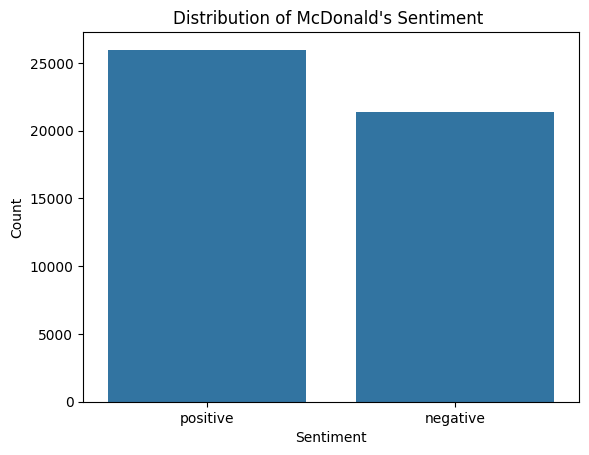

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_combined['sentiment'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of McDonald's Sentiment ")
plt.show()

In [28]:
df_combined['sentiment'].value_counts(normalize=True).sort_index()

sentiment
negative    0.451642
positive    0.548358
Name: proportion, dtype: float64

## Preparing the Data

Split the training data into training and validation sets using an 80/20 ratio.

Stratified sampling ensures both sets maintain the same class distribution for sentiment.

This step helps evaluate model performance before final testing.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_train["review"]  
y = df_train["sentiment"]  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

print(f"Training Samples: {len(X_train)}, Test Samples: {len(X_val)}")

Training Samples: 30320, Test Samples: 7580


## Model Building

This code trains and evaluates multiple classification models (Logistic Regression, SVC, Random Forest, Naive Bayes, Gradient Boosting) on McDonald's reviews for sentiment analysis. Each model is paired with a TF-IDF vectorizer for text feature extraction.

The models are trained, and their accuracies are compared. The Support Vector Classifier (SVC) achieves the highest accuracy of 0.8909, making it the best-performing model. A confusion matrix is displayed for SVC to visualize its performance in predicting sentiment (Negative vs. Positive).


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("classifier", LogisticRegression(random_state=42, max_iter=500))
])

# Support Vector Classifier Pipeline
svc_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("classifier", SVC(random_state=42))
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Naive Bayes Pipeline
nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("classifier", MultinomialNB())
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("classifier", GradientBoostingClassifier(random_state=42))
])


In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
accuracies = []

In [33]:
# Logistic Regression (BASELINE)
lr_pipeline.fit(X_train, y_train)
lr_y_pred = lr_pipeline.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_y_pred)
accuracies.append(("Logistic Regression", lr_accuracy))

In [34]:
# Support Vector Classifier
svc_pipeline.fit(X_train, y_train)
svc_y_pred = svc_pipeline.predict(X_val)
svc_accuracy = accuracy_score(y_val, svc_y_pred)
accuracies.append(("Support Vector Classifier", svc_accuracy))

In [35]:
# Random Forest
rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_y_pred)
accuracies.append(("Random Forest", rf_accuracy))

In [36]:
# Naive Bayes
nb_pipeline.fit(X_train, y_train)
nb_y_pred = nb_pipeline.predict(X_val)
nb_accuracy = accuracy_score(y_val, nb_y_pred)
accuracies.append(("Naive Bayes", nb_accuracy))

In [37]:
# Gradient Boosting
gb_pipeline.fit(X_train, y_train)
gb_y_pred = gb_pipeline.predict(X_val)
gb_accuracy = accuracy_score(y_val, gb_y_pred)
accuracies.append(("Gradient Boosting", gb_accuracy))

In [45]:
print("\nModel Accuracies:")
for name, acc in accuracies:
    print(f"{name:25s}: {acc:.4f}")


Model Accuracies:
Logistic Regression      : 0.8834
Support Vector Classifier: 0.8909
Random Forest            : 0.8752
Naive Bayes              : 0.8752
Gradient Boosting        : 0.8280


Best Performing Model was SVC with a accuracy of 0.8909 so it will be used for hyperparamter testing

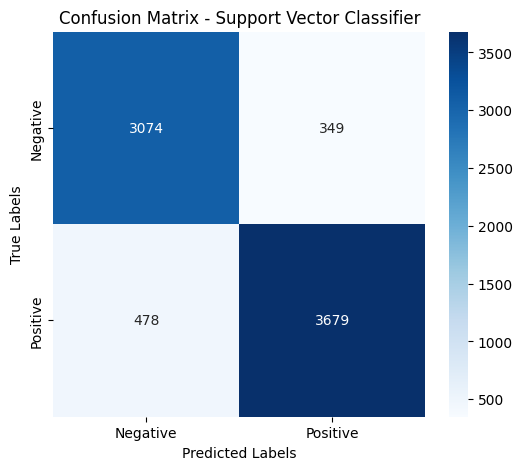

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for SVC model
cm = confusion_matrix(y_val, svc_y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()


## Hyperparamter Tuning with SVC

This code performs hyperparameter tuning for the Support Vector Classifier (SVC) model using GridSearchCV. The parameter grid searches through different values for the regularization parameter `C` and kernel types (`linear`, `rbf`, `poly`, `sigmoid`). 

Once the best parameters are identified, the model is re-trained using these optimal settings, and the validation accuracy is calculated. A confusion matrix is then plotted to assess the model's performance in classifying sentiments as Negative or Positive


In [39]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

grid_search = GridSearchCV(estimator=svc_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_svc_model = grid_search.best_estimator_

y_val_pred = best_svc_model.predict(X_val)

print("Tuned SVC:", f"{accuracy_score(y_val, y_val_pred):.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Validation Accuracy: 0.8908970976253299
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.90      0.88      3423
    positive       0.91      0.89      0.90      4157

    accuracy                           0.89      7580
   macro avg       0.89      0.89      0.89      7580
weighted avg       0.89      0.89      0.89      7580

CPU times: total: 3min 5s
Wall time: 50min 1s


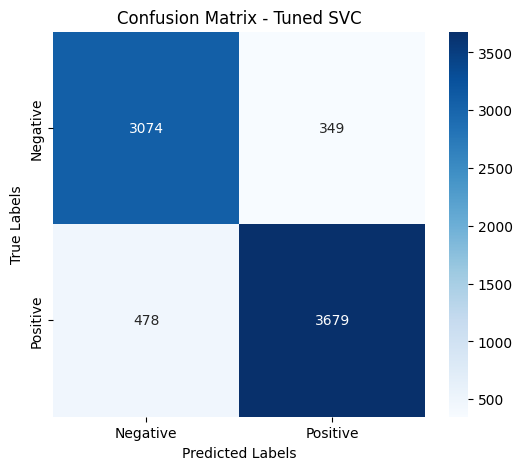

Tuned SVC: 0.8909


In [43]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Tuned SVC')
plt.show()

print("Tuned SVC:", f"{accuracy_score(y_val, y_val_pred):.4f}")

## Final Model

Tuned-SVC model with TF-IDF Vectorizer to preprocess the text on the test dataset has an **accuracy of 0.8912**.

This code processes the test dataset and predicts the sentiment labels using the best-tuned SVC model. The accuracy score and classification report are printed, providing a detailed evaluation of the model's performance on the test data. A confusion matrix is also visualized.

In [47]:
df_test = preprocess_text(df_test, 'review')

In [51]:
X_test = df_test['review']  
y_test = df_test['sentiment']  

y_test_pred = best_svc_model.predict(X_test)  

from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


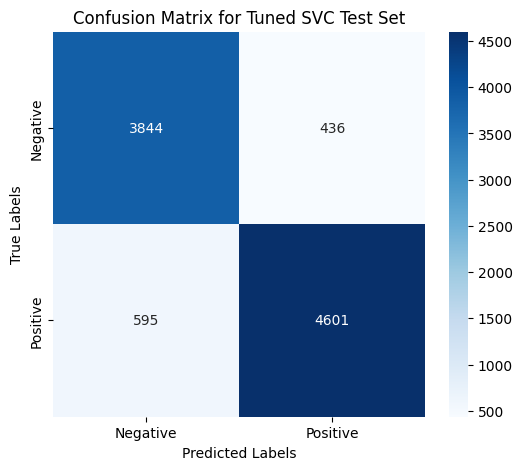

Tuned SVC Test Set Accuracy: 0.8912
Test Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.90      0.88      4280
    positive       0.91      0.89      0.90      5196

    accuracy                           0.89      9476
   macro avg       0.89      0.89      0.89      9476
weighted avg       0.89      0.89      0.89      9476



In [76]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Tuned SVC Test Set')
plt.show()

print("Tuned SVC Test Set Accuracy:", f"{accuracy_score(y_test, y_test_pred):.4f}")
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

## Trying out Word2Vec & Glove

**TF-IDF**: Counts word importance frequency

**Word2Vec**: Learns word meanings from context predicts a target word based on its surrounding words.

**GloVe**: Learns word relationships from global word co-occurrence. Counts how often words appear together.

Training and Testing for each text representation (TF-IDF, Word2Vec, and GloVe), with a SVC model.

After training, predictions are made on the validation set.

Then comparing the accuracy of the models for different vectorization techniques (TF-IDF, Word2Vec, and GloVe).

In [54]:
import gensim.downloader as api
import numpy as np

# google's pretrained Word2Vec model 
word2vec_model = api.load("word2vec-google-news-300")

# converting sentence to vector
def sentence_to_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)

# convert training and validation sets
X_train_w2v = np.array([sentence_to_vector(text, word2vec_model) for text in X_train])
X_val_w2v = np.array([sentence_to_vector(text, word2vec_model) for text in X_val])

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

w2v_svc_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("classifier", SVC(random_state=42))  
])

w2v_svc_pipeline.fit(X_train_w2v, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(random_state=42))])

In [56]:
import numpy as np

# glove model
glove_path = "C:/Users/benny/Desktop/glove.6B/glove.6B.100d.txt"

def load_glove_model(glove_file):
    embeddings = {}
    with open(glove_file, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype="float32")
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_model(glove_path)

# converting sentence to vector
def sentence_to_vector_glove(sentence, model, embedding_dim=100):
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(embedding_dim)

# convert datasets
X_train_glove = np.array([sentence_to_vector_glove(text, glove_embeddings) for text in X_train])
X_val_glove = np.array([sentence_to_vector_glove(text, glove_embeddings) for text in X_val])

In [60]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

glove_svc_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("classifier", SVC(random_state=42))  
])

glove_svc_pipeline.fit(X_train_glove, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(random_state=42))])

In [72]:
print("\nSVC with Different Text Representations:")
print("TF-IDF SVC (Base)        :", f"{svc_accuracy:.4f}")
print("Word2Vec + SVC           :", f"{accuracy_score(y_val, y_val_pred_w2v):.4f}")
print("GloVe + SVC              :", f"{accuracy_score(y_val, y_val_pred_glove):.4f}")


SVC with Different Text Representations:
TF-IDF SVC (Base)        : 0.8909
Word2Vec + SVC           : 0.8790
GloVe + SVC              : 0.8269
